In [ ]:
# name=Parush
#roll_no=102003404
#group=Co16

In [2]:
# dataset link 
#https://archive.ics.uci.edu/ml/datasets/ISOLET
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [49]:
data = pd.read_csv("dataset.csv",header=None)

In [50]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [51]:
X=data.drop(0,axis=1)
X

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [53]:
y=data.iloc[:,0]
y

0        T
1        I
2        D
3        N
4        G
        ..
19995    D
19996    C
19997    T
19998    S
19999    A
Name: 0, Length: 20000, dtype: object

In [54]:
x_train, x_test, y_train, y_test = [], [], [], []
for _ in range(10):
    x1, x2, y1, y2 = train_test_split(X, y, test_size=0.3, shuffle=True)
    x_train.append(x1)
    y_train.append(y1)
    x_test.append(x2)
    y_test.append(y2)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt

svm_model = SVC()
param_grid = {
    "kernel": ["linear","rbf"],
    "C":[50,75,40,45],
    "max_iter":[1000]
}
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)
best_params_list = []
best_score_list = []
iteration_list = []
final=pd.DataFrame()
for i in range(10):
    for _ in range(1000):
        x_train1 = x_train[i]
        x_test1 = x_test[i]
        y_train1 = y_train[i]
        y_test1 = y_test[i]
        grid_search.fit(x_train1, y_train1)
        best_params_list.append(grid_search.best_params_)
        best_score_list.append(grid_search.best_score_)
        iteration_list.append(i)
    results_df = pd.DataFrame({'best_params': best_params_list, 'best_score': best_score_list,'iteration':iteration_list})
    results_df
    plt.plot(iteration_list,best_score_list)
    plt.xlabel('Iteration')
    plt.ylabel('Best Score')
    plt.title('Convergence Graph')
    plt.show()

In [60]:
results_df

,best_params,best_score,iteration
0,"{'C': 45, 'kernel': 'rbf', 'max_iter': 1000}",0.963500,0
1,"{'C': 40, 'kernel': 'rbf', 'max_iter': 1000}",0.963857,1
2,"{'C': 75, 'kernel': 'rbf', 'max_iter': 1000}",0.963714,2
3,"{'C': 45, 'kernel': 'rbf', 'max_iter': 1000}",0.962929,3
4,"{'C': 75, 'kernel': 'rbf', 'max_iter': 1000}",0.964286,4
5,"{'C': 50, 'kernel': 'rbf', 'max_iter': 1000}",0.962143,5
6,"{'C': 45, 'kernel': 'rbf', 'max_iter': 1000}",0.964143,6
7,"{'C': 75, 'kernel': 'rbf', 'max_iter': 1000}",0.962571,7
8,"{'C': 40, 'kernel': 'rbf', 'max_iter': 1000}",0.964643,8
9,"{'C': 40, 'kernel': 'rbf', 'max_iter': 1000}",0.961357,9


In [ ]:
sample1 

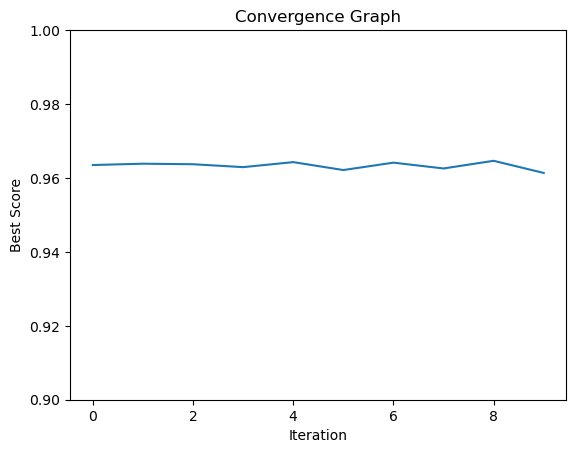

In [66]:
plt.plot(iteration_list,best_score_list)
plt.ylim(0.9,1)
plt.xlabel('Iteration')
plt.ylabel('Best Score')
plt.title('Convergence Graph')
plt.show()
